# Прогназ прибыли для нефтяных скважин

В условной нефтедобывающей компании необходимо решить, где бурить новую скважину. В распоряжении данные проб нефти в трёх регионах. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
pd.options.mode.chained_assignment = None

In [2]:
def review(df): 
    """функция для отображения общей информации"""
    info = display(df.head(10)), df.info(), display(df.describe(), df.corr())

In [3]:
def boxplot(df):
    """функция для построения коробок с усами"""
    sns.boxplot(x = df)  
    sns.set_style('darkgrid')
    plt.show()

In [4]:
def split_data(features, target):
    """функция для формирования обучающей и валидационной выборок"""
    (features_train, features_valid, target_train, target_valid) = train_test_split(features, target, test_size = 0.25, random_state=12345)
    return (features_train, features_valid, target_train, target_valid)

In [5]:
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df_0 = pd.read_csv('geo_data_0.csv')

In [6]:
try:
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df_1 = pd.read_csv('geo_data_1.csv')

In [7]:
try:
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_2 = pd.read_csv('geo_data_2.csv')

## Загрузка и подготовка данных

In [8]:
review(df_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


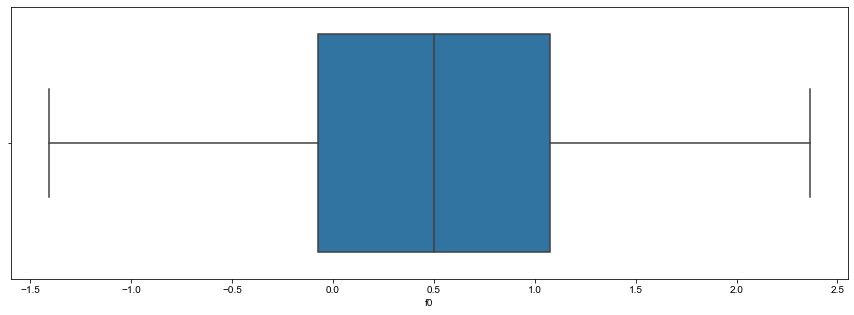

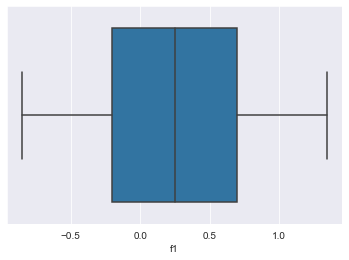

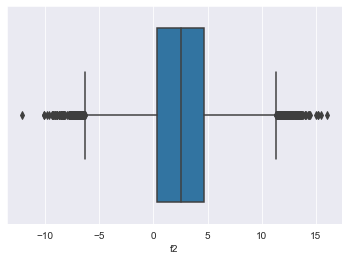

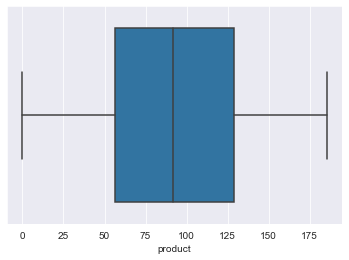

In [9]:
fig, ax = plt.subplots(figsize =(15,5))
boxplot(df_0['f0'])
boxplot(df_0['f1'])
boxplot(df_0['f2'])
boxplot(df_0['product'])
plt.show()

df_0, f2

In [10]:
review(df_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


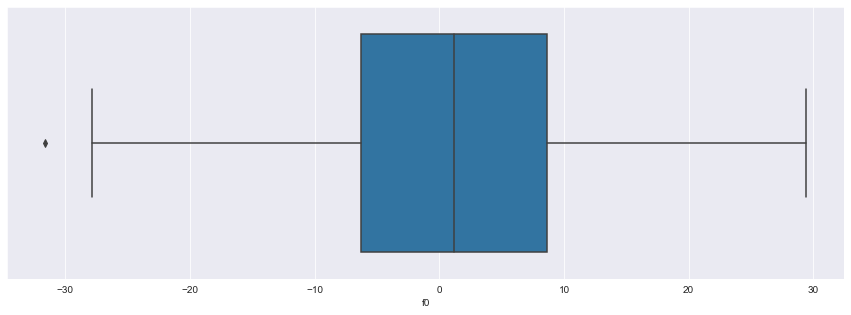

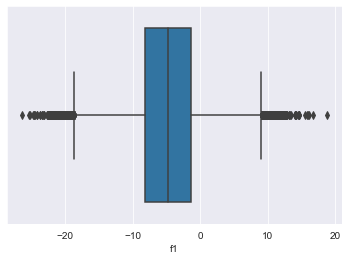

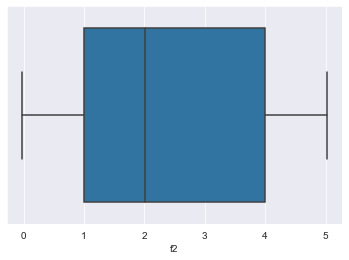

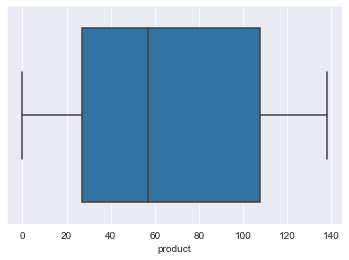

In [11]:
fig, ax = plt.subplots(figsize =(15,5))
boxplot(df_1['f0'])
boxplot(df_1['f1'])
boxplot(df_1['f2'])
boxplot(df_1['product'])
plt.show()

In [12]:
review(df_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


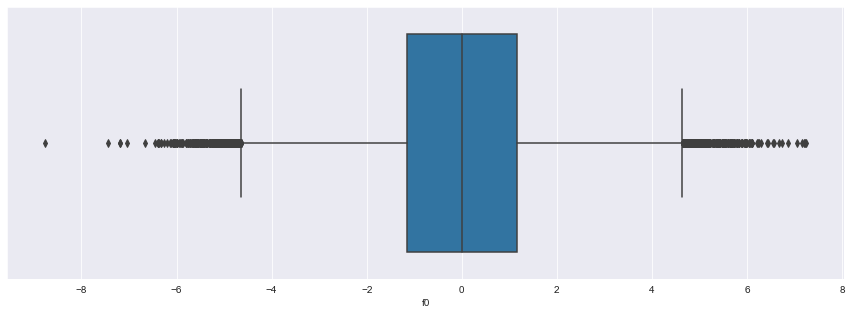

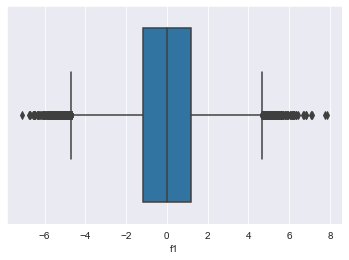

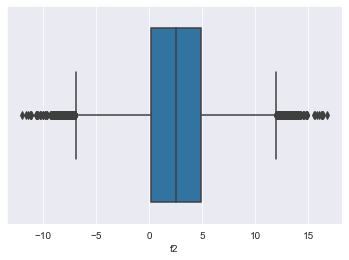

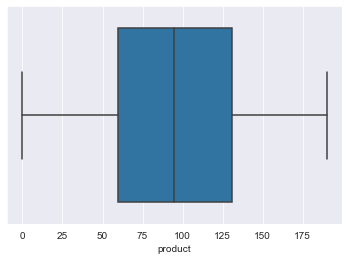

In [13]:
fig, ax = plt.subplots(figsize =(15,5))
boxplot(df_2['f0'])
boxplot(df_2['f1'])
boxplot(df_2['f2'])
boxplot(df_2['product'])
plt.show()

In [14]:
def remove_ouliers(df,column):
    """функция для удаления выбросов"""
    q25=np.array(df[column].quantile(0.25))
    q75=np.array(df[column].quantile(0.75))
    min = q25-1.5*(q75-q25)
    max = q75+1.5*(q75-q25)
    del_index = []
    for index_value, value in zip(df[column].index,df[column]):
        if max <= value or value <= min:
            del_index.append(index_value)
    print('Количество удаленных строк: ',len(del_index))
    return del_index

In [15]:
noise_df = [(df_0,'f2'),
            (df_1, 'f1'),
            (df_2, 'f0'),
            (df_2, 'f1'),
            (df_2, 'f2')
             ]

for frame,column in noise_df:
    indexes = remove_ouliers(frame,column)
    frame.drop(indexes,axis = 0,inplace = True)

Количество удаленных строк:  506
Количество удаленных строк:  636
Количество удаленных строк:  733
Количество удаленных строк:  682
Количество удаленных строк:  582


## Обучение и проверка модели

In [16]:
(features_train_df_0, 
 features_valid_df_0, 
 target_train_df_0, 
 target_valid_df_0) = split_data(df_0.drop(['id', 'product'],
                                 axis = 1),
                                 df_0['product']
                                )
(features_train_df_1, 
 features_valid_df_1, 
 target_train_df_1, 
 target_valid_df_1) = split_data(df_1.drop(['id', 'product'],
                                 axis = 1),
                                 df_1['product']
                                )
(features_train_df_2, 
 features_valid_df_2, 
 target_train_df_2, 
 target_valid_df_2) = split_data(df_2.drop(['id', 'product'],
                                 axis = 1),
                                 df_2['product']
                                )

In [17]:
model = LinearRegression() 
model.fit(features_train_df_0, target_train_df_0)
predictions_valid_df_0 = model.predict(features_valid_df_0) 
result_df_0 = mean_squared_error(target_valid_df_0, predictions_valid_df_0)**0.5
print('Cредний запас предсказанного сырья по региону df_0 равен {} тыс. баррелей'.format(predictions_valid_df_0.mean()))
print('RMSE модели линейной регрессии на валидационной выборке по региону df_0 равна {}'.format(result_df_0))

Cредний запас предсказанного сырья по региону df_0 равен 92.72476770114888 тыс. баррелей
RMSE модели линейной регрессии на валидационной выборке по региону df_0 равна 37.92293089053146


In [18]:
model = LinearRegression() 
model.fit(features_train_df_1, target_train_df_1)
predictions_valid_df_1 = model.predict(features_valid_df_1) 
result_df_1 = mean_squared_error(target_valid_df_1, predictions_valid_df_1)**0.5
print('Cредний запас предсказанного сырья по региону df_1 равен {} тыс. баррелей'.format(predictions_valid_df_1.mean()))
print('RMSE модели линейной регрессии на валидационной выборке по региону df_1 равна {}'.format(result_df_1))

Cредний запас предсказанного сырья по региону df_1 равен 68.59166978153502 тыс. баррелей
RMSE модели линейной регрессии на валидационной выборке по региону df_1 равна 0.8894478146401599


In [19]:
model = LinearRegression() 
model.fit(features_train_df_2, target_train_df_2)
predictions_valid_df_2 = model.predict(features_valid_df_2) 
result_df_2 = mean_squared_error(target_valid_df_2, predictions_valid_df_2)**0.5
print('Cредний запас предсказанного сырья по региону df_2 равен {} тыс. баррелей'.format(predictions_valid_df_2.mean()))
print('RMSE модели линейной регрессии на валидационной выборке по региону df_2 равна {}'.format(result_df_2))

Cредний запас предсказанного сырья по региону df_2 равен 94.67716913212332 тыс. баррелей
RMSE модели линейной регрессии на валидационной выборке по региону df_2 равна 40.17679711012713


## Подготовка к расчёту прибыли

## Расчёт прибыли и рисков 